# Sentiment Analysis on iPhone 15 Reviews from Flipkart

## Objective:
To analyze customer sentiment for the iPhone 15 (128GB) based on Flipkart reviews. This includes:
- Scraping reviews
- Cleaning and preprocessing text
- Performing sentiment analysis (positive/negative)
- Deriving insights using data visualization

## Tools & Technologies Used 
 - Selenium :-  Web automation & scraping reviews
 - BeautifulSoup:-Parsing HTML and extracting review content 
 - Pandas:- Data cleaning, manipulation, and analysis
 - TextBlob:-Sentiment polarity and subjectivity analysis
 - Matplotlib:-Visualizing sentiment distribution & metrics
 - Seaborn:-Creating attractive statistical plots 
 - WordCloud:-Visualizing most common words in reviews
 - NLTK:-Text preprocessing like stopword removal, lemmatization
 - Regex (re):-Cleaning emojis, special characters, etc.
## Project Steps:

1. **Data Collection**  
   - Scrape usernames, ratings, and review text using Selenium + BeautifulSoup.

2. **Data Cleaning & Preprocessing**  
   - Remove emojis, punctuation, special characters  
   - Convert to lowercase, tokenize, remove stopwords  
   - Apply lemmatization

3. **Sentiment Analysis**  
   - Use TextBlob to calculate **Polarity** and **Subjectivity**  
   - Classify reviews as **Positive** (≥ 0.1 polarity) or **Negative** (< 0.1 polarity)

4. **Data Visualization & Insights**  
   - Sentiment distribution chart  
   - Boxplot of Rating vs Polarity  
   - Word Clouds for positive & negative reviews  
   - Review length vs sentiment analysis  
   - Subjectivity histogram

---

## Final Output:
- Cleaned dataset with sentiment tags  
- Visual insights about customer feedback  
- Suggestions based on real customer voice

---

> This project demonstrates the full pipeline of collecting real-world data, processing it, analyzing customer sentiment, and turning it into meaningful insights.


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdpra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mdpra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###  Setting Up Headless Chrome WebDriver
To scrape data from Flipkart using Selenium, we need a browser to load the pages.

Normally, the Chrome browser opens visibly, but that slows things down. So, we use **headless mode** — it runs Chrome in the background without showing the window.


In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)

# Flipkart Product Review Page

In [3]:
url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART"
names, ratings, reviews = [], [], []

for page in range(1, 16):
    print(f"Scraping page {page}...")
    try:
        driver.get(url + f"&page={page}")
        time.sleep(5)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        name_tags = soup.find_all("p", class_="_2NsDsF AwS1CA")
        rating_tags = soup.find_all("div", class_="XQDdHH Ga3i8K")
        review_tags = soup.find_all("div", class_="ZmyHeo")

        for name_tag, rating_tag, review_tag in zip(name_tags, rating_tags, review_tags):
            name = name_tag.text.strip()
            rating = rating_tag.text.strip()
            review = review_tag.get_text(strip=True)
            names.append(name)
            ratings.append(rating)
            reviews.append(review)

    except Exception as e:
        print(f"Failed to load page {page}: {e}")
        continue

driver.quit()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...


# Create DataFrame Using Dictonary

In [28]:
df = pd.DataFrame({
    "Username": names,
    "Rating": ratings,
    "Review": reviews
})


In [29]:
df.head()

,Username,Rating,Review
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
1,Ajin V,5,High quality camera😍READ MORE
2,Flipkart Customer,5,Awesome photography experience. Battery backup...
3,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE
4,Mousam Guha Roy,4,Very niceREAD MORE


# Remove Emoji from the Reviews 

In [5]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = remove_emojis(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Review'] = df['Review'].apply(clean_text)


In [31]:
df.head()

,Username,Rating,Review
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...
1,Ajin V,5,high quality cameraread
2,Flipkart Customer,5,awesome photography experience battery backup ...
3,Rishabh Jha,5,awesome read
4,Mousam Guha Roy,4,niceread


# Calculate Polarity

In [7]:
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df[['Review', 'Polarity']]


,Review,Polarity
0,go itamazing onebeautiful camera super fast pr...,0.266667
1,high quality cameraread,0.160000
2,awesome photography experience battery backup ...,0.733333
3,awesome read,1.000000
4,niceread,0.000000
...,...,...
145,speechlessso beautifulso elegantjust looking l...,0.000000
146,gud productread,0.000000
147,good product value money term suitable type pr...,0.412500
148,battery lasted longer first relationship day l...,0.300000


# Calculate Subjectivity

In [8]:
df['Subjectivity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df[['Review', 'Subjectivity']]


,Review,Subjectivity
0,go itamazing onebeautiful camera super fast pr...,0.633333
1,high quality cameraread,0.540000
2,awesome photography experience battery backup ...,0.700000
3,awesome read,1.000000
4,niceread,0.000000
...,...,...
145,speechlessso beautifulso elegantjust looking l...,0.000000
146,gud productread,0.000000
147,good product value money term suitable type pr...,0.562500
148,battery lasted longer first relationship day l...,0.595833


# Calculate Sentiment

In [20]:
df['Sentiment'] = df['Polarity'].apply(lambda x: "Positive" if x >= 0.1 else "Negative")
df

,Username,Rating,Review,Polarity,Subjectivity,Review_Length,Sentiment
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,7,Positive
1,Ajin V,5,high quality cameraread,0.160000,0.540000,3,Positive
2,Flipkart Customer,5,awesome photography experience battery backup ...,0.733333,0.700000,10,Positive
3,Rishabh Jha,5,awesome read,1.000000,1.000000,2,Positive
4,Mousam Guha Roy,4,niceread,0.000000,0.000000,1,Negative
...,...,...,...,...,...,...,...
145,Kishan Behera,5,speechlessso beautifulso elegantjust looking l...,0.000000,0.000000,10,Negative
146,MOHAMMAD SHAHNAWAZ,5,gud productread,0.000000,0.000000,2,Negative
147,Malay Singha,5,good product value money term suitable type pr...,0.412500,0.562500,17,Positive
148,Yash saini,5,battery lasted longer first relationship day l...,0.300000,0.595833,30,Positive


# Calculate Mean of Polarity

In [9]:
df["Polarity"].mean()

0.4612939233605901

# Subjectivity Distribution in iPhone 15 Reviews

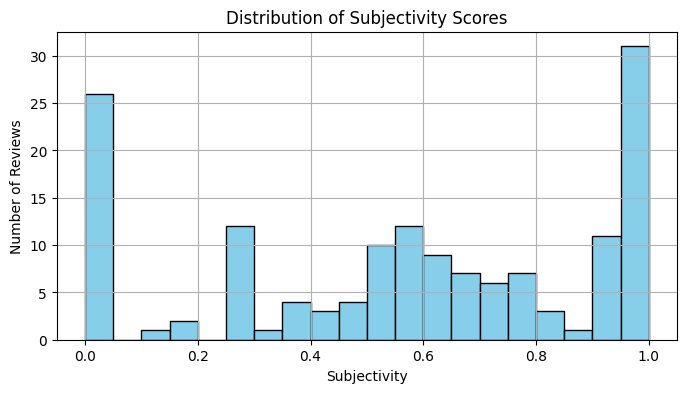

In [10]:
plt.figure(figsize=(8,4))
df['Subjectivity'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Subjectivity Scores")
plt.xlabel("Subjectivity")
plt.ylabel("Number of Reviews")
plt.show()


#  1. Sentiment Distribution Chart

C:\Users\mdpra\AppData\Local\Temp\ipykernel_20296\702130435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


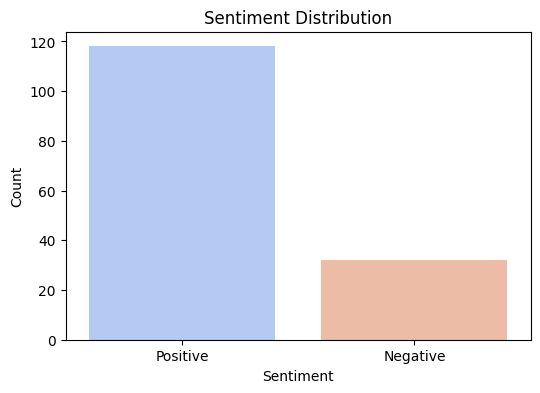

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#  2. Rating vs Polarity Chart (Boxplot)

C:\Users\mdpra\AppData\Local\Temp\ipykernel_20296\348061668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rating', y='Polarity', palette='viridis')


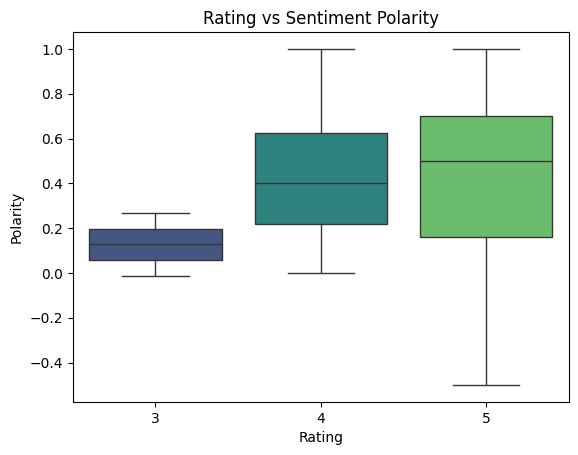

In [22]:
df['Rating'] = df['Rating'].astype(int)  # Make sure it's numeric
sns.boxplot(data=df, x='Rating', y='Polarity', palette='viridis')
plt.title("Rating vs Sentiment Polarity")
plt.show()

# 3.Word Cloud - Positive Reviews

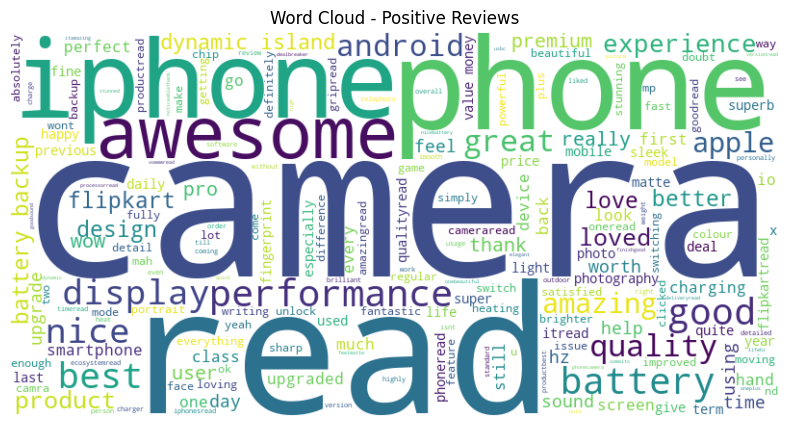

In [23]:
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()


#  4. Word Cloud - Negative Reviews

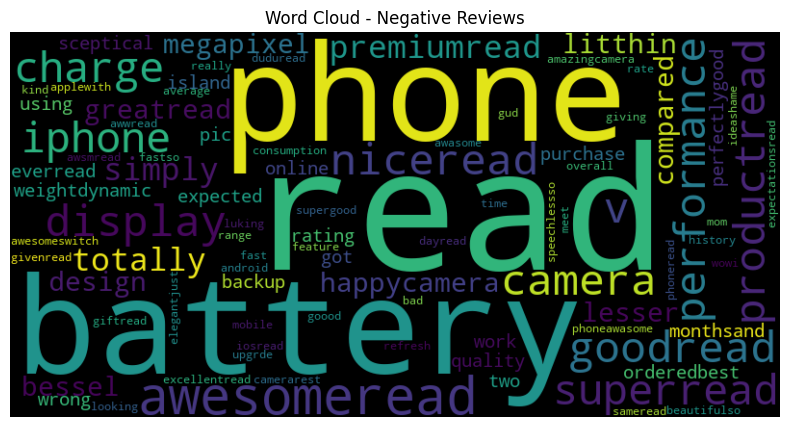

In [24]:
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()

#  5. Review Length vs Sentiment Chart

C:\Users\mdpra\AppData\Local\Temp\ipykernel_20296\1992792518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='pastel')


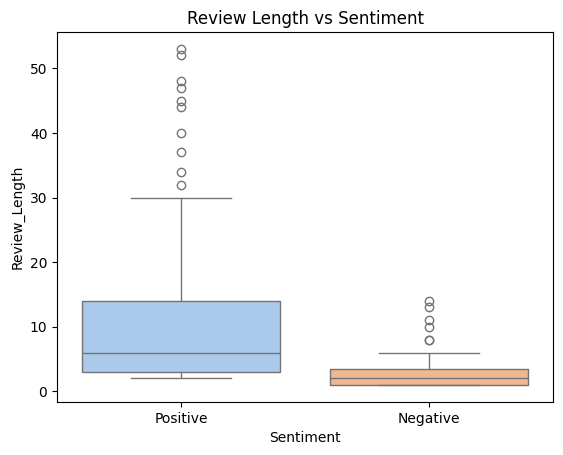

In [25]:
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))

sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='pastel')
plt.title("Review Length vs Sentiment")
plt.show()

In [17]:
df

,Username,Rating,Review,Polarity,Subjectivity,Review_Length
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,7
1,Ajin V,5,high quality cameraread,0.160000,0.540000,3
2,Flipkart Customer,5,awesome photography experience battery backup ...,0.733333,0.700000,10
3,Rishabh Jha,5,awesome read,1.000000,1.000000,2
4,Mousam Guha Roy,4,niceread,0.000000,0.000000,1
...,...,...,...,...,...,...
145,Kishan Behera,5,speechlessso beautifulso elegantjust looking l...,0.000000,0.000000,10
146,MOHAMMAD SHAHNAWAZ,5,gud productread,0.000000,0.000000,2
147,Malay Singha,5,good product value money term suitable type pr...,0.412500,0.562500,17
148,Yash saini,5,battery lasted longer first relationship day l...,0.300000,0.595833,30


In [32]:
df.to_csv("iphone15_cleaned_reviews_new.csv", index=False)
print("Saved cleaned data to iphone15_cleaned_reviews.csv")

Saved cleaned data to iphone15_cleaned_reviews.csv
